In [250]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Function to read data from file
def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            point = line.split()
            data.append([float(point[0]), float(point[1])])
    return np.array(data)
# Read data from files
class1 = read_data('Class1.txt')
class2 = read_data('Class2.txt')
class3 = read_data('Class3.txt')
print(class1[:10])
print(class2[:10])
print(class3[:10])

[[11.583  -3.5809]
 [11.505  -3.2135]
 [15.642  -5.6477]
 [14.741  -5.2833]
 [11.993  -6.7999]
 [11.534  -4.496 ]
 [11.27   -1.6088]
 [17.996  -7.2315]
 [17.81   -8.6418]
 [15.991  -8.7738]]
[[ 4.6028  8.0725]
 [ 4.6114  9.7239]
 [ 7.288  14.085 ]
 [ 5.3265 11.392 ]
 [ 4.7385 11.327 ]
 [ 3.2799  7.4152]
 [ 7.5951 12.873 ]
 [ 7.2697  9.5396]
 [ 1.1127  8.5271]
 [ 2.72    7.0668]]
[[-2.6047  -2.8167 ]
 [-3.9341  -1.5962 ]
 [-3.9064  -7.1782 ]
 [-2.7848  -5.1521 ]
 [-0.64373 -9.194  ]
 [-3.7613  -5.5735 ]
 [-3.0703  -4.3506 ]
 [-4.5626  -3.2737 ]
 [-5.5242   0.69877]
 [-5.3272  -8.0835 ]]


In [251]:
def manual_train_test_split(data, train_size=0.7):
    np.random.shuffle(data)
    split_index = int(train_size * len(data))
    return data[:split_index], data[split_index:]
train_data1, test_data1 = manual_train_test_split(class1)
train_data2, test_data2 = manual_train_test_split(class2)
train_data3, test_data3 = manual_train_test_split(class3)

# Combine data from all classes
train_data = np.vstack((train_data1, train_data2, train_data3))
train_labels = np.array([0]*len(train_data1) + [1]*len(train_data2) + [2]*len(train_data3))

test_data = np.vstack((test_data1, test_data2, test_data3))
test_labels = np.array([0]*len(test_data1) + [1]*len(test_data2) + [2]*len(test_data3))
print("Train Data is:")
print(train_data[:10])
print("Test Data is:")     
print(test_data[:10])

Train Data is:
[[ 16.241   -5.7283]
 [ 18.056   -7.6608]
 [ 14.224   -6.0931]
 [ 17.197  -10.43  ]
 [ 10.935   -4.1535]
 [ 17.182   -6.5294]
 [ 14.735   -6.0022]
 [ 18.297   -5.5996]
 [ 12.45    -4.2069]
 [ 11.897   -3.4159]]
Test Data is:
[[13.94   -4.1442]
 [13.273  -6.2277]
 [20.159  -6.5274]
 [13.417  -5.5395]
 [15.026  -6.9431]
 [12.361  -2.1174]
 [14.476  -5.2265]
 [16.384  -5.3585]
 [12.784  -2.3937]
 [15.355  -6.6123]]


In [252]:
def compute_mean_cov(data):
    return np.mean(data, axis=0), np.cov(data.T)

mean1, cov1 = compute_mean_cov(train_data[train_labels == 0])
mean2, cov2 = compute_mean_cov(train_data[train_labels == 1])
mean3, cov3 = compute_mean_cov(train_data[train_labels == 2])
print(mean1,mean2,mean3)
print(cov1,cov2,cov3)
meanarr=np.array([mean1,mean2,mean3])

[14.83961686 -6.01115971] [ 5.20763786 10.10840743] [-2.96052649 -5.03573012]
[[ 5.80334979 -2.55223589]
 [-2.55223589  2.74812686]] [[6.6198929  2.57712234]
 [2.57712234 4.56795189]] [[ 5.56071909 -5.19925622]
 [-5.19925622  8.93179168]]


In [253]:
def gaussian_density(x, mean, cov):
    d = x - mean
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    exponent = -0.5 * np.dot(np.dot(d.T, inv_cov), d)
    normalization = 1.0 / (2 * np.pi * np.sqrt(det_cov))
    return normalization * np.exp(exponent)

# Posterior probability function
def posterior_probability(x, mean, cov, prior):
    likelihood = gaussian_density(x, mean, cov)
    posterior = likelihood * prior
    return posterior

# Classify based on posterior probability
def classify_2(x,mean1,mean2,cov1,cov2,priors):
    post_class1 = posterior_probability(x, mean1, cov1, priors[0])
    post_class2 = posterior_probability(x, mean2, cov2, priors[1])
    return np.argmax([post_class1, post_class2])
def classify(x, mean1, mean2, mean3, cov1,cov2,cov3, priors):
    post_class1 = posterior_probability(x, mean1, cov1, priors[0])
    post_class2 = posterior_probability(x, mean2, cov2, priors[1])
    post_class3 = posterior_probability(x, mean3, cov3, priors[2])
    return np.argmax([post_class1, post_class2, post_class3])


In [254]:
priors = np.array([len(train_data1), len(train_data2), len(train_data3)]) / len(train_data)

In [255]:
def confusion_matrix(true_labels, predictions, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predictions):
        cm[true, pred] += 1
    return cm

def accuracy_score(true_labels, predictions):
    return np.mean(np.array(true_labels) == np.array(predictions))

def precision_score(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    return np.nan_to_num(precision)  # Convert NaN to 0

def recall_score(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    return np.nan_to_num(recall)  # Convert NaN to 0

def f1_score(true_labels, predictions, num_classes):
    precision = precision_score(true_labels, predictions, num_classes)
    recall = recall_score(true_labels, predictions, num_classes)
    f1 = 2 * (precision * recall) / (precision + recall)
    return np.nan_to_num(f1)  # Convert NaN to 0

def compute_metrics(true_labels, predictions, num_classes):
    cm = confusion_matrix(true_labels, predictions, num_classes)
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, num_classes)
    mean_precision = np.mean(precision)
    recall = recall_score(true_labels, predictions, num_classes)
    mean_recall = np.mean(recall)
    f1 = f1_score(true_labels, predictions, num_classes)
    mean_f1 = np.mean(f1)

    return cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1
def print_metrics(title, metrics):
    cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1 = metrics
    print(f"{title}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Recall: {recall}")
    print(f"Mean Recall: {mean_recall}")
    print(f"F-measure: {f1}")
    print(f"Mean F-measure: {mean_f1}\n")   

In [256]:
def plot_decision_region(train_data, train_labels, classifier, title, priors):
    # Define grid limits
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Apply classifier over the grid points
    Z = np.array([classifier(np.array([x, y]), priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot for training data
    scatter = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Add a legend using scatter.legend_elements()
    legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                         labels=[str(label) for label in np.unique(train_labels)],  # Convert labels to strings
                         title="Classes", loc="upper right")

    plt.show()
def plot_decision_region_2(train_data, train_labels, classifier, mean1, mean2,title,priors,class_pair):
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    # Apply classifier over the grid points
    Z = np.array([classifier(np.array([x, y]), mean1, mean2, priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot for training data
    scatter = plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')

    # Add title and axis labels
    plt.title(title)
    plt.xlabel('Class ' + str(class_pair[0]))
    plt.ylabel('Class ' + str(class_pair[1]))

    # Add legend using scatter.legend_elements()
    legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                         labels=['Class ' + str(class_pair[0]), 'Class ' + str(class_pair[1])],
                         loc="upper right")

    plt.show()
def plot_contour(train_data, train_labels, means, covs, title):
    x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
    y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    plt.figure(figsize=(8, 6))

    # Plot contours for each class
    for mean, cov in zip(means, covs):
        Z = np.array([gaussian_density(np.array([x, y]), mean, cov) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=5, alpha=0.75)

    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def pairdata(train_data,train_labels,class_pair):
    class1, class2 = class_pair
    pair_data = train_data[(train_labels == class1) | (train_labels == class2)]
    pair_labels = train_labels[(train_labels == class1) | (train_labels == class2)]
    pair_labels[pair_labels == class1] = 0
    pair_labels[pair_labels == class2] = 1
    return [pair_data,pair_labels]


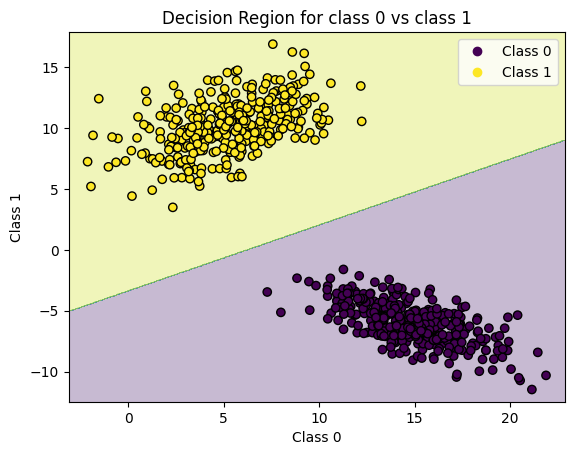

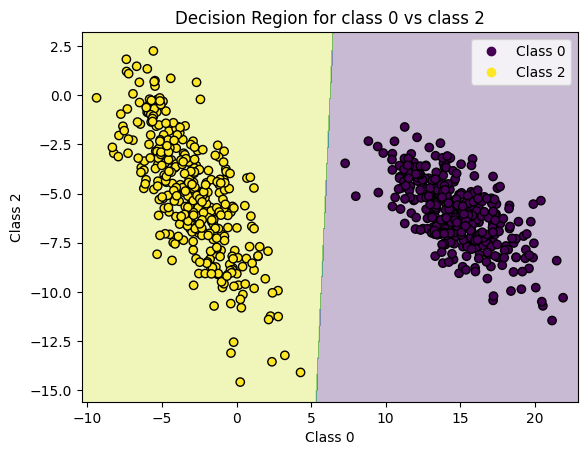

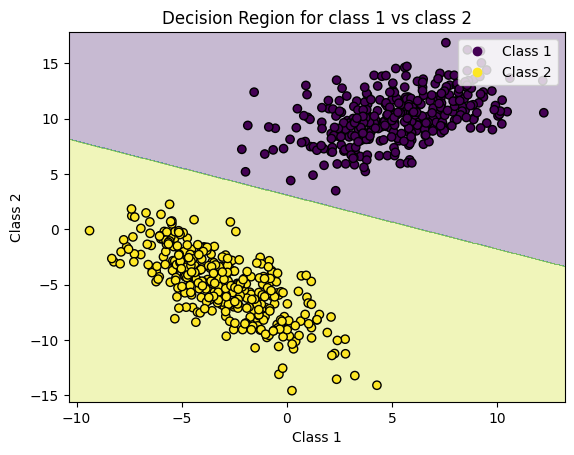

In [257]:
# Implement classifiers
sigma_squared = (cov1 + cov2 + cov3) / 3
sigma_squared_identity = np.diag(np.diag(sigma_squared))

def classifier_sigma_squared_identity(x, priors):
    return classify(x, mean1, mean2, mean3, sigma_squared_identity,sigma_squared_identity,sigma_squared_identity, priors)
def classifier_sigma_squared_identity_2(x,mean1,mean2,priors):
    return classify_2(x, mean1, mean2,sigma_squared_identity,sigma_squared_identity,priors)    
    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_sigma_squared_identity_2,m1,m2,title,[0.5,0.5],i)

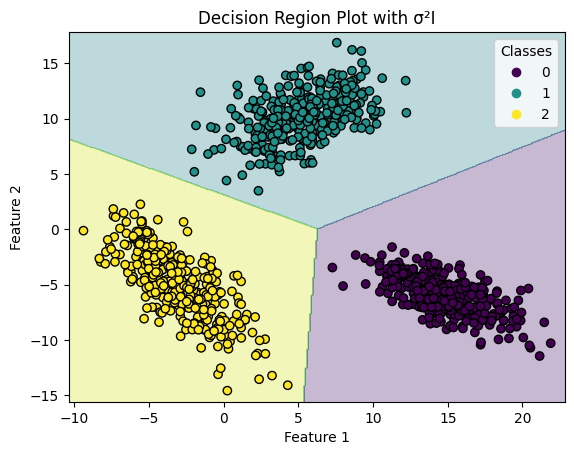

In [258]:
#DECISION REGION FOR ALL THE CLASSES
plot_decision_region(train_data, train_labels, classifier_sigma_squared_identity, "Decision Region Plot with σ²I",priors)

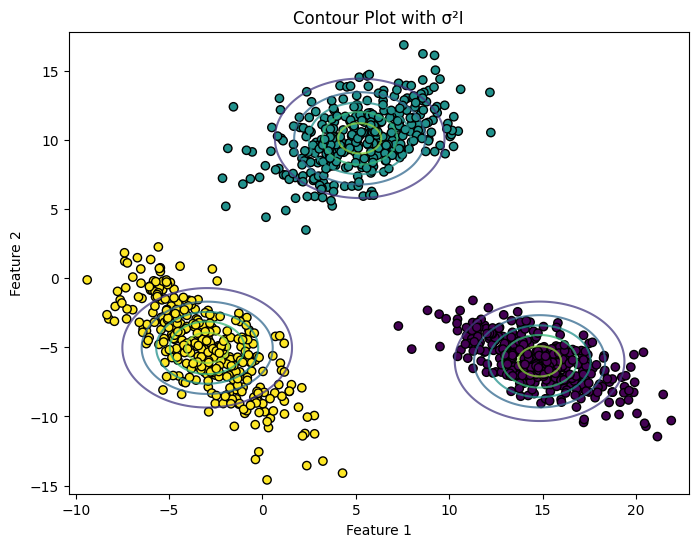

In [259]:

plot_contour(train_data, train_labels, [mean1, mean2, mean3], [sigma_squared_identity]*3, "Contour Plot with σ²I")

In [260]:
predictions_sigma_squared_identity = np.array([classifier_sigma_squared_identity(x, priors) for x in test_data])
metrics_sigma_squared_identity = compute_metrics(test_labels, predictions_sigma_squared_identity, 3)
print_metrics("Classifier with σ²I", metrics_sigma_squared_identity)

Classifier with σ²I
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.0
Precision: [1. 1. 1.]
Mean Precision: 1.0
Recall: [1. 1. 1.]
Mean Recall: 1.0
F-measure: [1. 1. 1.]
Mean F-measure: 1.0



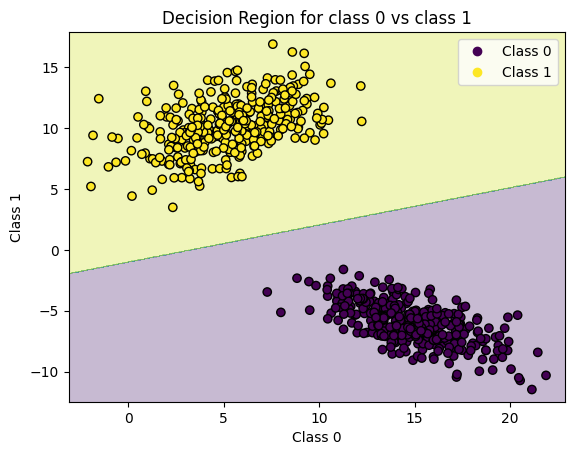

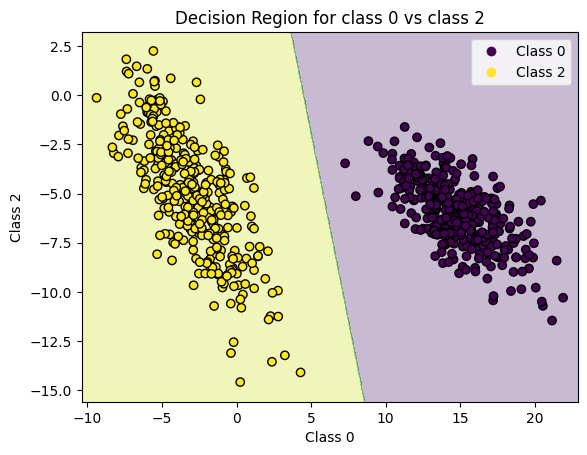

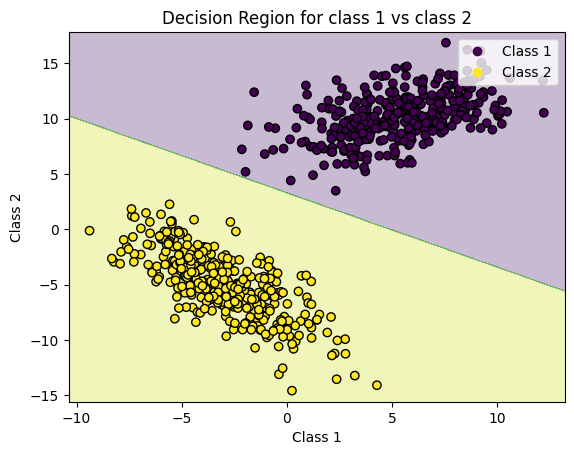

In [261]:
#Full covariasnce
cov_avg = (cov1 + cov2 + cov3) / 3
def classifier_full_covariance(x, priors):
    return classify(x, mean1, mean2, mean3, cov_avg,cov_avg,cov_avg, priors)
def classifier_full_covariance_2(x,mean1,mean2,priors):
    return classify_2(x, mean1, mean2,cov_avg,cov_avg,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_full_covariance_2,m1,m2,title,[0.5,0.5],i)

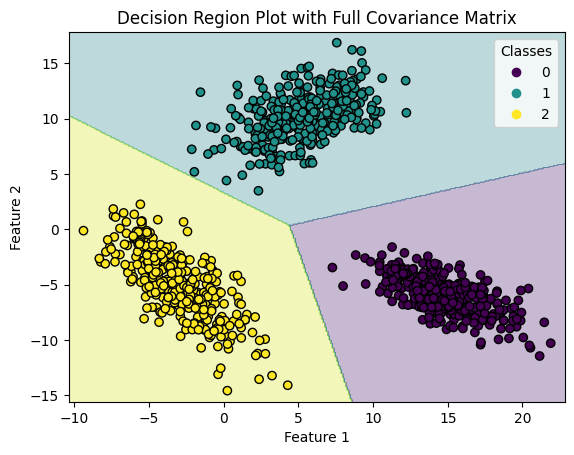

In [262]:
#decision for all classes using full covariance
plot_decision_region(train_data, train_labels, classifier_full_covariance, "Decision Region Plot with Full Covariance Matrix",priors)

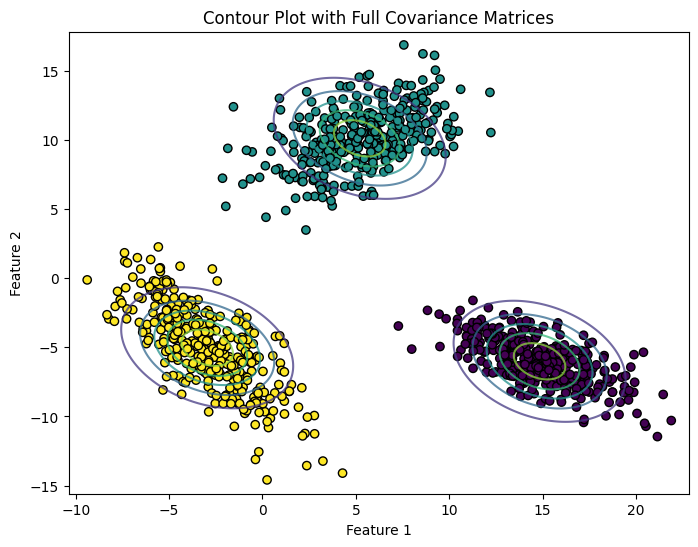

In [263]:
#Contour for all 3 classes using full covariance
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [cov_avg]*3, "Contour Plot with Full Covariance Matrices")

In [264]:
predictions_full_covariance = np.array([classifier_full_covariance(x, priors) for x in test_data])
metrics_full_covariance = compute_metrics(test_labels, predictions_full_covariance, 3)
print_metrics("Classifier with Full Covariance Matrix Σ", metrics_full_covariance)

Classifier with Full Covariance Matrix Σ
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.0
Precision: [1. 1. 1.]
Mean Precision: 1.0
Recall: [1. 1. 1.]
Mean Recall: 1.0
F-measure: [1. 1. 1.]
Mean F-measure: 1.0



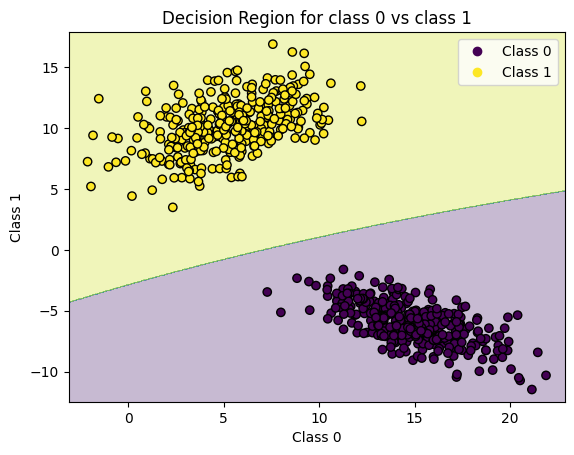

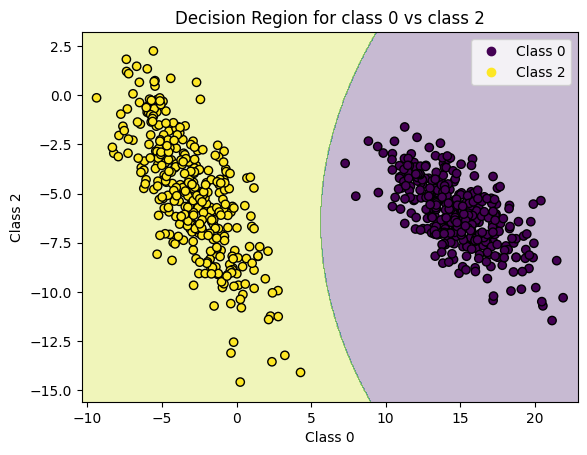

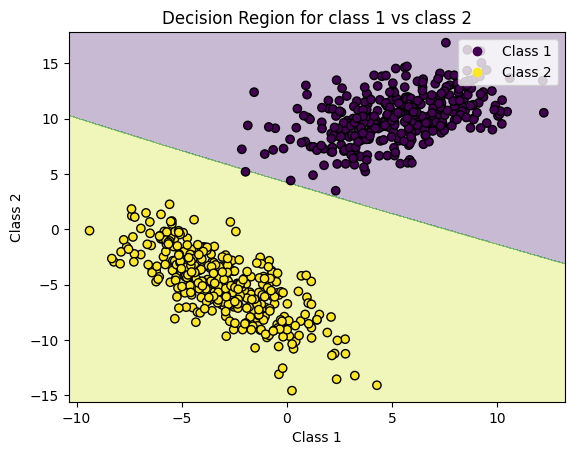

In [265]:
diag_cov1 = np.diag(np.diag(cov1))
diag_cov2 = np.diag(np.diag(cov2))
diag_cov3 = np.diag(np.diag(cov3))
diagcovarr=np.array([diag_cov1,diag_cov2,diag_cov3])
def classifier_diag_covariance(x, priors):
    return classify(x, mean1, mean2, mean3, diag_cov1, diag_cov2, diag_cov3, priors)  
def classifier_diag_covariance_2(x,mean1,mean2,priors):
    cov1,cov2= diagcovarr[np.where(meanarr == mean1)[0][0]] , diagcovarr[np.where(meanarr == mean2)[0][0]]
    return classify_2(x, mean1, mean2,cov1,cov2,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_diag_covariance_2,m1,m2,title,[0.5,0.5],i)

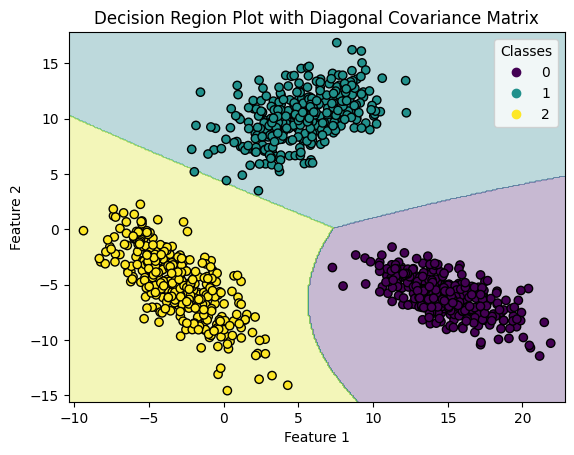

In [266]:
#decision for all classes using diagonal covariance
plot_decision_region(train_data, train_labels, classifier_diag_covariance, "Decision Region Plot with Diagonal Covariance Matrix",priors)

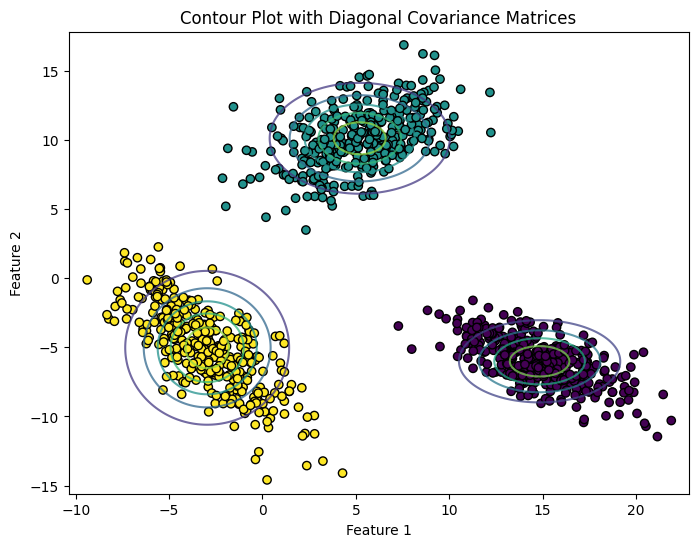

In [267]:
#contour plot for diagonal covariance matrix
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [diag_cov1, diag_cov2, diag_cov3], "Contour Plot with Diagonal Covariance Matrices")

In [268]:
predictions_diag_covariance = np.array([classifier_diag_covariance(x, priors) for x in test_data])
metrics_diag_covariance = compute_metrics(test_labels, predictions_diag_covariance, 3)
print_metrics("Classifier with Diagonal Covariance Matrix", metrics_diag_covariance)

Classifier with Diagonal Covariance Matrix
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.0
Precision: [1. 1. 1.]
Mean Precision: 1.0
Recall: [1. 1. 1.]
Mean Recall: 1.0
F-measure: [1. 1. 1.]
Mean F-measure: 1.0



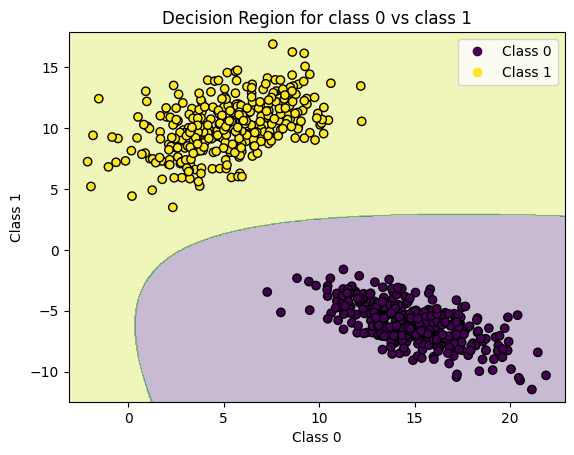

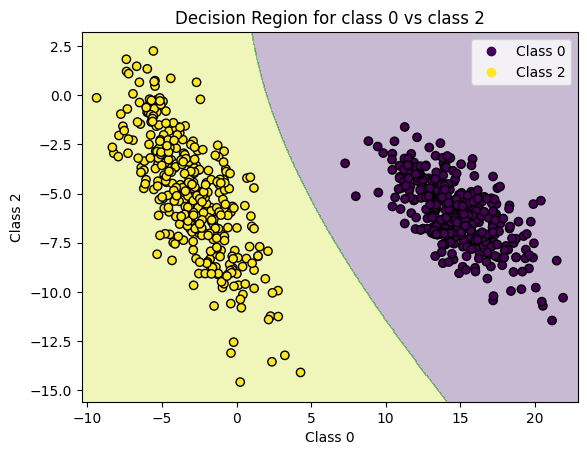

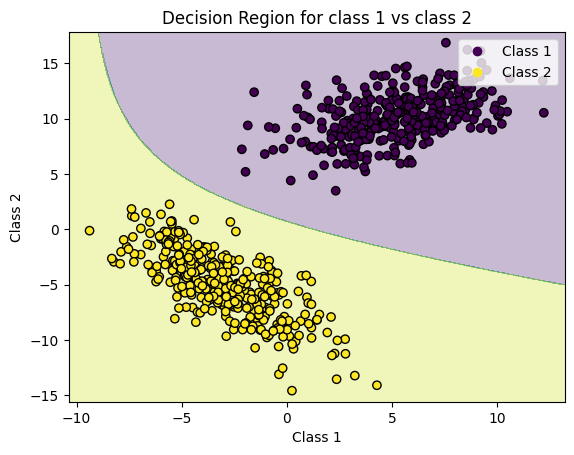

In [269]:
covarr=np.array([cov1,cov2,cov3])
def classifier_full_covariance_per_class(x, priors):
    return classify(x, mean1, mean2, mean3, cov1, cov2, cov3, priors)  
def classifier_full_covariance_per_class_2(x,mean1,mean2,priors):
    cov1,cov2= covarr[np.where(meanarr == mean1)[0][0]] ,covarr[np.where(meanarr == mean2)[0][0]]
    return classify_2(x, mean1, mean2,cov1,cov2,priors)    
class_pairs=[(0,1),(0,2),(1,2)]
for i in class_pairs:
    pair_data,pair_labels=pairdata(train_data,train_labels,i)
    m1,m2=meanarr[i[0]],meanarr[i[1]]
    title=f'Decision Region for class {i[0]} vs class {i[1]}'
    plot_decision_region_2(pair_data,pair_labels,classifier_full_covariance_per_class_2,m1,m2,title,[0.5,0.5],i)

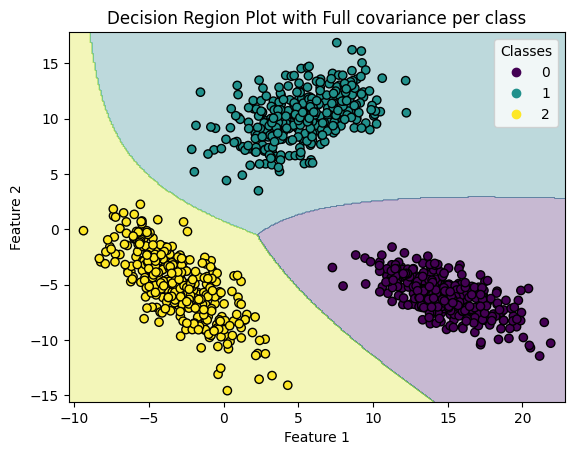

In [270]:
plot_decision_region(train_data, train_labels, classifier_full_covariance_per_class, "Decision Region Plot with Full covariance per class",priors)

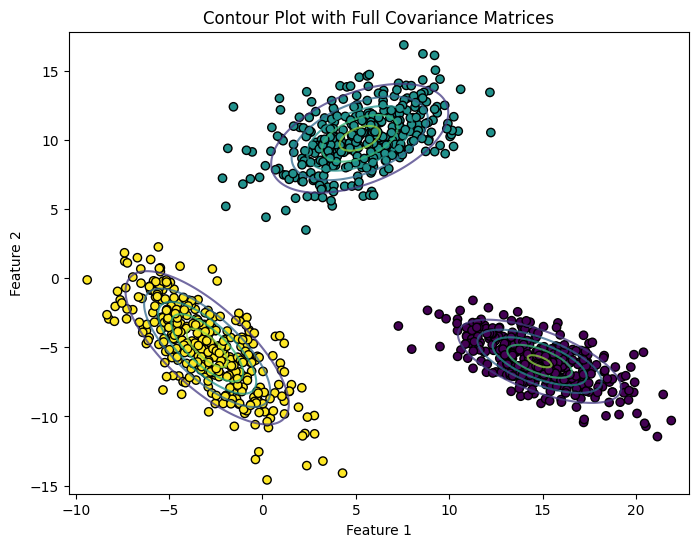

In [271]:
#contour plot full covariance per class
plot_contour(train_data, train_labels, [mean1, mean2, mean3], [cov1, cov2, cov3], "Contour Plot with Full Covariance Matrices")

In [272]:
predictions_full_covariance_per_class = np.array([classifier_full_covariance_per_class(x, priors) for x in test_data])
metrics_full_covariance_per_class = compute_metrics(test_labels, predictions_full_covariance_per_class, 3)
print_metrics("Classifier with Full Covariance Matrix per Class", metrics_full_covariance_per_class)

Classifier with Full Covariance Matrix per Class
Confusion Matrix:
[[150   0   0]
 [  0 150   0]
 [  0   0 150]]
Accuracy: 1.0
Precision: [1. 1. 1.]
Mean Precision: 1.0
Recall: [1. 1. 1.]
Mean Recall: 1.0
F-measure: [1. 1. 1.]
Mean F-measure: 1.0

